In [108]:
import pandas as pd
import numpy as np


In [109]:
df1=pd.read_csv('/content/Data1.csv')
df2=pd.read_csv('/content/Data2.csv')
df3=pd.read_csv('/content/Data3.csv')

In [110]:
empty_cells_per_column = df1.isnull().sum()
empty_cells_per_column

Hotel Name              0
Review                  0
Number of Reviews       0
Review Score            0
City                 1370
dtype: int64

In [111]:
empty_cells_per_column = df2.isnull().sum()
empty_cells_per_column


Hotel Name                1
Free WiFi                 0
Family rooms              0
Non-smoking rooms         0
Restaurant                0
Bar                       0
Heating                   0
Lift                      0
Breakfast Cuisine 1     696
Breakfast Cuisine 2    1205
Breakfast Cuisine 3    1416
dtype: int64

In [112]:
df2 = df2.dropna(subset=['Hotel Name'])
empty_cells_per_column = df2.isnull().sum()
empty_cells_per_column

Hotel Name                0
Free WiFi                 0
Family rooms              0
Non-smoking rooms         0
Restaurant                0
Bar                       0
Heating                   0
Lift                      0
Breakfast Cuisine 1     695
Breakfast Cuisine 2    1204
Breakfast Cuisine 3    1415
dtype: int64

In [113]:
empty_cells_per_column = df3.isnull().sum()
empty_cells_per_column

Hotel Name    0
Room Type     0
Single Bed    0
Double Bed    0
Price         0
dtype: int64

In [114]:
merged_df = pd.merge(df1, df2, on="Hotel Name")
merged_df = pd.merge(merged_df, df3, on="Hotel Name")
merged_df = merged_df.drop_duplicates()
merged_df

,Hotel Name,Review,Number of Reviews,Review Score,City,Free WiFi,Family rooms,Non-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed,Price
0,DoubleTree by Hilton Dubai M Square Hotel & Re...,Fabulous,"2,711 reviews",8.5,NaN,no,no,no,no,no,no,no,Continental,Italian,Full English/Irish,King Guest Room,No,Yes,"₹ 13,614"
2,Radisson Dubai Damac Hills,8.0,"2,569 reviews",8.4,NaN,no,no,yes,no,no,no,no,Continental,Full English/Irish,Vegetarian,Standard Room,No,No,"₹ 9,030"
4,Queen Elizabeth 2 Hotel,Very good,"2,872 reviews",7.8,NaN,no,no,no,no,no,no,no,Continental,Full English/Irish,Vegetarian,Classic King Room,No,Yes,"₹ 8,182"
6,"Holiday Inn Dubai Al-Maktoum Airport, an IHG H...",10,"16,598 reviews",7.8,NaN,no,no,no,no,no,no,yes,NaN,NaN,NaN,Deluxe King or Twin Room - Free Shuttle to Jum...,No,No,"₹ 8,990"
8,"Holiday Inn Express Dubai Airport, an IHG Hotel",Exceptional,551 reviews,8.3,NaN,no,no,yes,no,no,no,no,Continental,Italian,Vegetarian,Double Room - Smoking (Free Shuttle Bus to Air...,No,Yes,"₹ 7,297"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,Hotel Belle Via Tokyo,Very good,103 reviews,8.0,Show on map,yes,yes,yes,no,no,no,no,NaN,NaN,NaN,Double or Twin Room,Yes,No,"₹ 5,938"
1101,HOTEL MYSTAYS Kanda,Fabulous,371 reviews,7.9,Show on map,yes,no,yes,no,no,no,yes,NaN,NaN,NaN,Standard Double Room - Non-Smoking,No,Yes,"₹ 14,805"
1102,APA Hotel Kodemmacho-ekimae,8.3,831 reviews,7.5,"Taito, Tokyo",yes,no,yes,yes,no,no,yes,Italian,NaN,NaN,Double Room - Non-Smoking,No,Yes,"₹ 13,220"
1103,APA Hotel Ginza Shintomicho Ekimae - Former AP...,8.1,885 reviews,7.6,"Taito, Tokyo",yes,no,yes,yes,no,yes,yes,American,NaN,NaN,Double Room - Non-Smoking,No,Yes,"₹ 15,260"


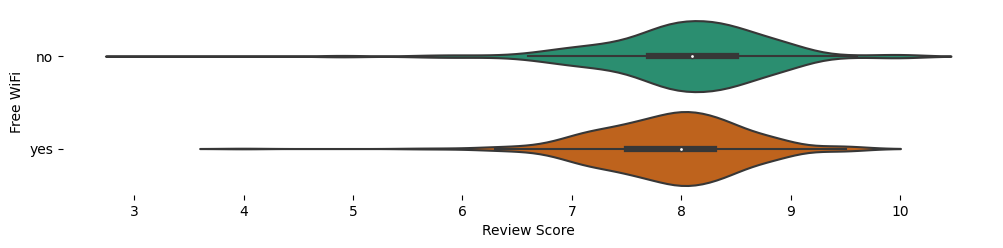

In [115]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(merged_df['Free WiFi'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(merged_df, x='Review Score', y='Free WiFi', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

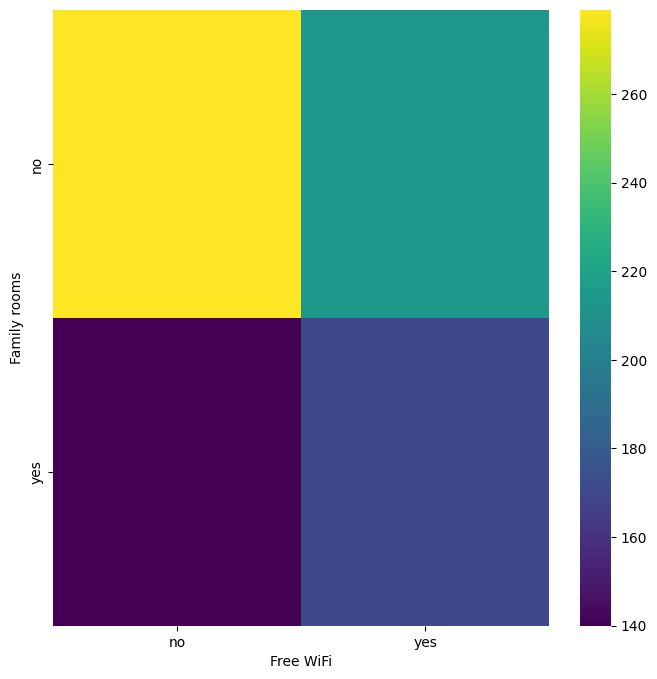

In [116]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Family rooms'].value_counts()
    for x_label, grp in merged_df.groupby('Free WiFi')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Free WiFi')
_ = plt.ylabel('Family rooms')

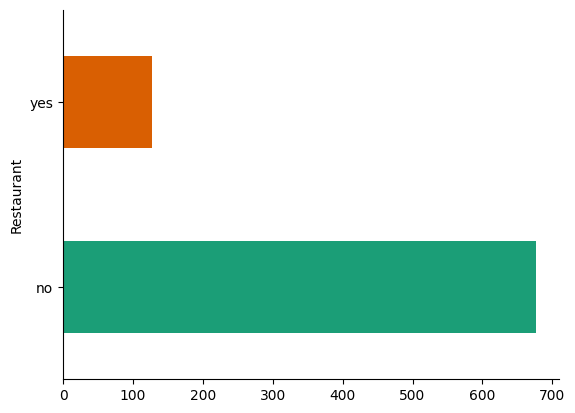

In [117]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('Restaurant').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

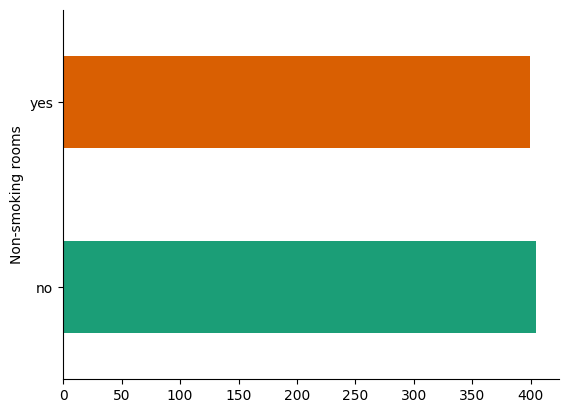

In [118]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('Non-smoking rooms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

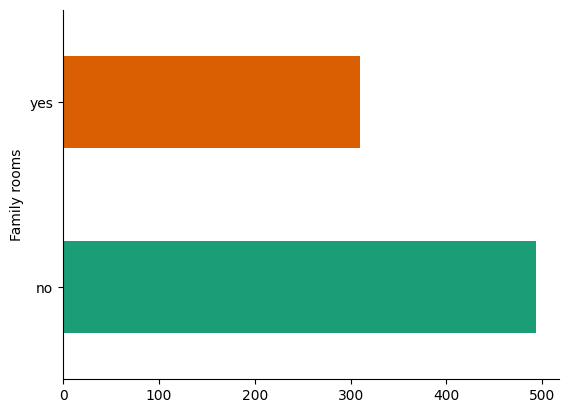

In [119]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('Family rooms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

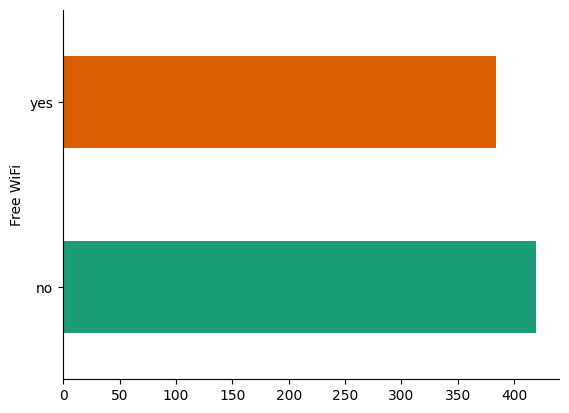

In [120]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('Free WiFi').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

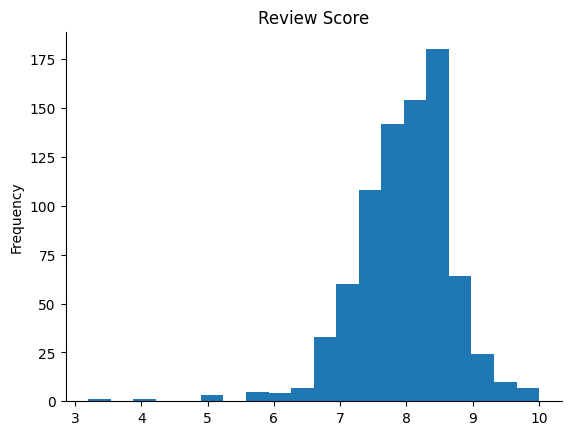

In [121]:
from matplotlib import pyplot as plt
merged_df['Review Score'].plot(kind='hist', bins=20, title='Review Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [122]:
duplicates = merged_df['Hotel Name'].duplicated()
duplicates

0       False
2       False
4       False
6       False
8       False
        ...  
1100    False
1101    False
1102    False
1103    False
1104    False
Name: Hotel Name, Length: 803, dtype: bool

In [123]:
empty_cells_per_column = merged_df.isnull().sum()
empty_cells_per_column

Hotel Name               0
Review                   0
Number of Reviews        0
Review Score             0
City                   635
Free WiFi                0
Family rooms             0
Non-smoking rooms        0
Restaurant               0
Bar                      0
Heating                  0
Lift                     0
Breakfast Cuisine 1    217
Breakfast Cuisine 2    415
Breakfast Cuisine 3    514
Room Type                0
Single Bed               0
Double Bed               0
Price                    0
dtype: int64

In [124]:
merged_df

,Hotel Name,Review,Number of Reviews,Review Score,City,Free WiFi,Family rooms,Non-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed,Price
0,DoubleTree by Hilton Dubai M Square Hotel & Re...,Fabulous,"2,711 reviews",8.5,NaN,no,no,no,no,no,no,no,Continental,Italian,Full English/Irish,King Guest Room,No,Yes,"₹ 13,614"
2,Radisson Dubai Damac Hills,8.0,"2,569 reviews",8.4,NaN,no,no,yes,no,no,no,no,Continental,Full English/Irish,Vegetarian,Standard Room,No,No,"₹ 9,030"
4,Queen Elizabeth 2 Hotel,Very good,"2,872 reviews",7.8,NaN,no,no,no,no,no,no,no,Continental,Full English/Irish,Vegetarian,Classic King Room,No,Yes,"₹ 8,182"
6,"Holiday Inn Dubai Al-Maktoum Airport, an IHG H...",10,"16,598 reviews",7.8,NaN,no,no,no,no,no,no,yes,NaN,NaN,NaN,Deluxe King or Twin Room - Free Shuttle to Jum...,No,No,"₹ 8,990"
8,"Holiday Inn Express Dubai Airport, an IHG Hotel",Exceptional,551 reviews,8.3,NaN,no,no,yes,no,no,no,no,Continental,Italian,Vegetarian,Double Room - Smoking (Free Shuttle Bus to Air...,No,Yes,"₹ 7,297"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,Hotel Belle Via Tokyo,Very good,103 reviews,8.0,Show on map,yes,yes,yes,no,no,no,no,NaN,NaN,NaN,Double or Twin Room,Yes,No,"₹ 5,938"
1101,HOTEL MYSTAYS Kanda,Fabulous,371 reviews,7.9,Show on map,yes,no,yes,no,no,no,yes,NaN,NaN,NaN,Standard Double Room - Non-Smoking,No,Yes,"₹ 14,805"
1102,APA Hotel Kodemmacho-ekimae,8.3,831 reviews,7.5,"Taito, Tokyo",yes,no,yes,yes,no,no,yes,Italian,NaN,NaN,Double Room - Non-Smoking,No,Yes,"₹ 13,220"
1103,APA Hotel Ginza Shintomicho Ekimae - Former AP...,8.1,885 reviews,7.6,"Taito, Tokyo",yes,no,yes,yes,no,yes,yes,American,NaN,NaN,Double Room - Non-Smoking,No,Yes,"₹ 15,260"


In [125]:
def get_hotel_quality(score):
    if score >= 0 and score <= 2.5:
        return 'Good'
    elif score > 2.5 and score <= 5:
        return 'Very Good'
    elif score > 5 and score <= 7.5:
        return 'Pleasant'
    elif score > 7.5 and score <= 10:
        return 'Superb'
    else:
        return 'Invalid'

In [126]:
merged_df['Hotel Quality'] = merged_df['Review Score'].apply(get_hotel_quality)
merged_df.fillna("not available", inplace=True)
merged_df['Number of Reviews']=merged_df['Number of Reviews'].str.replace('reviews','').str.replace(',','').str.replace('review','')
merged_df['Price']=merged_df['Price'].str.replace('₹','').str.replace(',','').str.replace('review','')
merged_df['Price']=merged_df['Price'].astype(float)

In [127]:
merged_df

,Hotel Name,Review,Number of Reviews,Review Score,City,Free WiFi,Family rooms,Non-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed,Price,Hotel Quality
0,DoubleTree by Hilton Dubai M Square Hotel & Re...,Fabulous,2711,8.5,not available,no,no,no,no,no,no,no,Continental,Italian,Full English/Irish,King Guest Room,No,Yes,13614.0,Superb
2,Radisson Dubai Damac Hills,8.0,2569,8.4,not available,no,no,yes,no,no,no,no,Continental,Full English/Irish,Vegetarian,Standard Room,No,No,9030.0,Superb
4,Queen Elizabeth 2 Hotel,Very good,2872,7.8,not available,no,no,no,no,no,no,no,Continental,Full English/Irish,Vegetarian,Classic King Room,No,Yes,8182.0,Superb
6,"Holiday Inn Dubai Al-Maktoum Airport, an IHG H...",10,16598,7.8,not available,no,no,no,no,no,no,yes,not available,not available,not available,Deluxe King or Twin Room - Free Shuttle to Jum...,No,No,8990.0,Superb
8,"Holiday Inn Express Dubai Airport, an IHG Hotel",Exceptional,551,8.3,not available,no,no,yes,no,no,no,no,Continental,Italian,Vegetarian,Double Room - Smoking (Free Shuttle Bus to Air...,No,Yes,7297.0,Superb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,Hotel Belle Via Tokyo,Very good,103,8.0,Show on map,yes,yes,yes,no,no,no,no,not available,not available,not available,Double or Twin Room,Yes,No,5938.0,Superb
1101,HOTEL MYSTAYS Kanda,Fabulous,371,7.9,Show on map,yes,no,yes,no,no,no,yes,not available,not available,not available,Standard Double Room - Non-Smoking,No,Yes,14805.0,Superb
1102,APA Hotel Kodemmacho-ekimae,8.3,831,7.5,"Taito, Tokyo",yes,no,yes,yes,no,no,yes,Italian,not available,not available,Double Room - Non-Smoking,No,Yes,13220.0,Pleasant
1103,APA Hotel Ginza Shintomicho Ekimae - Former AP...,8.1,885,7.6,"Taito, Tokyo",yes,no,yes,yes,no,yes,yes,American,not available,not available,Double Room - Non-Smoking,No,Yes,15260.0,Superb


In [128]:
empty_cells_per_column = merged_df.isnull().sum()
empty_cells_per_column

Hotel Name             0
Review                 0
Number of Reviews      0
Review Score           0
City                   0
Free WiFi              0
Family rooms           0
Non-smoking rooms      0
Restaurant             0
Bar                    0
Heating                0
Lift                   0
Breakfast Cuisine 1    0
Breakfast Cuisine 2    0
Breakfast Cuisine 3    0
Room Type              0
Single Bed             0
Double Bed             0
Price                  0
Hotel Quality          0
dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

selected_columns = ['Number of Reviews', 'Review Score', 'Breakfast Cuisine 1', 'Breakfast Cuisine 2',
                    'Breakfast Cuisine 3', 'Room Type', 'Free WiFi', 'Family rooms',
                    'Non-smoking rooms', 'Restaurant', 'Bar', 'Heating', 'Lift', 'Price', 'Hotel Quality']

new_df = merged_df[selected_columns].copy()

target = 'Hotel Quality'

#one-hot encoding
categorical_features = ['Breakfast Cuisine 1','Breakfast Cuisine 2', 'Breakfast Cuisine 3', 'Room Type','Free WiFi', 'Family rooms', 'Non-smoking rooms',
            'Restaurant', 'Bar', 'Heating', 'Lift']
new_df = pd.get_dummies(new_df, columns=categorical_features)



In [130]:
columnnames=new_df.columns
columnnames

Index(['Number of Reviews', 'Review Score', 'Price', 'Hotel Quality',
       'Breakfast Cuisine 1_American', 'Breakfast Cuisine 1_Asian',
       'Breakfast Cuisine 1_Breakfast to go', 'Breakfast Cuisine 1_Buffet',
       'Breakfast Cuisine 1_Continental',
       'Breakfast Cuisine 1_Full English/Irish',
       ...
       'Non-smoking rooms_no', 'Non-smoking rooms_yes', 'Restaurant_no',
       'Restaurant_yes', 'Bar_no', 'Bar_yes', 'Heating_no', 'Heating_yes',
       'Lift_no', 'Lift_yes'],
      dtype='object', length=364)

In [131]:
# Split the data into training and testing sets

X = new_df[new_df.columns.drop(target)]
y = new_df[target]





In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
#random forest classifier (you can choose a different model if needed)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.99
Confusion Matrix:
[[ 33   1   0]
 [  0 126   0]
 [  1   0   0]]
Classification Report:
              precision    recall  f1-score   support

    Pleasant       0.97      0.97      0.97        34
      Superb       0.99      1.00      1.00       126
   Very Good       0.00      0.00      0.00         1

    accuracy                           0.99       161
   macro avg       0.65      0.66      0.66       161
weighted avg       0.98      0.99      0.98       161



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
new_df.columns

Index(['Number of Reviews', 'Review Score', 'Price', 'Hotel Quality',
       'Breakfast Cuisine 1_American', 'Breakfast Cuisine 1_Asian',
       'Breakfast Cuisine 1_Breakfast to go', 'Breakfast Cuisine 1_Buffet',
       'Breakfast Cuisine 1_Continental',
       'Breakfast Cuisine 1_Full English/Irish',
       ...
       'Non-smoking rooms_no', 'Non-smoking rooms_yes', 'Restaurant_no',
       'Restaurant_yes', 'Bar_no', 'Bar_yes', 'Heating_no', 'Heating_yes',
       'Lift_no', 'Lift_yes'],
      dtype='object', length=364)

In [137]:
merged_df

,Hotel Name,Review,Number of Reviews,Review Score,City,Free WiFi,Family rooms,Non-smoking rooms,Restaurant,Bar,Heating,Lift,Breakfast Cuisine 1,Breakfast Cuisine 2,Breakfast Cuisine 3,Room Type,Single Bed,Double Bed,Price,Hotel Quality
0,DoubleTree by Hilton Dubai M Square Hotel & Re...,Fabulous,2711,8.5,not available,no,no,no,no,no,no,no,Continental,Italian,Full English/Irish,King Guest Room,No,Yes,13614.0,Superb
2,Radisson Dubai Damac Hills,8.0,2569,8.4,not available,no,no,yes,no,no,no,no,Continental,Full English/Irish,Vegetarian,Standard Room,No,No,9030.0,Superb
4,Queen Elizabeth 2 Hotel,Very good,2872,7.8,not available,no,no,no,no,no,no,no,Continental,Full English/Irish,Vegetarian,Classic King Room,No,Yes,8182.0,Superb
6,"Holiday Inn Dubai Al-Maktoum Airport, an IHG H...",10,16598,7.8,not available,no,no,no,no,no,no,yes,not available,not available,not available,Deluxe King or Twin Room - Free Shuttle to Jum...,No,No,8990.0,Superb
8,"Holiday Inn Express Dubai Airport, an IHG Hotel",Exceptional,551,8.3,not available,no,no,yes,no,no,no,no,Continental,Italian,Vegetarian,Double Room - Smoking (Free Shuttle Bus to Air...,No,Yes,7297.0,Superb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,Hotel Belle Via Tokyo,Very good,103,8.0,Show on map,yes,yes,yes,no,no,no,no,not available,not available,not available,Double or Twin Room,Yes,No,5938.0,Superb
1101,HOTEL MYSTAYS Kanda,Fabulous,371,7.9,Show on map,yes,no,yes,no,no,no,yes,not available,not available,not available,Standard Double Room - Non-Smoking,No,Yes,14805.0,Superb
1102,APA Hotel Kodemmacho-ekimae,8.3,831,7.5,"Taito, Tokyo",yes,no,yes,yes,no,no,yes,Italian,not available,not available,Double Room - Non-Smoking,No,Yes,13220.0,Pleasant
1103,APA Hotel Ginza Shintomicho Ekimae - Former AP...,8.1,885,7.6,"Taito, Tokyo",yes,no,yes,yes,no,yes,yes,American,not available,not available,Double Room - Non-Smoking,No,Yes,15260.0,Superb


In [138]:
selected_columns = ['Number of Reviews', 'Review Score', 'Breakfast Cuisine 1', 'Breakfast Cuisine 2',
                    'Breakfast Cuisine 3', 'Room Type', 'Free WiFi', 'Family rooms',
                    'Non-smoking rooms', 'Restaurant', 'Bar', 'Heating', 'Lift', 'Price', 'Hotel Quality']

price_pred_df = merged_df[selected_columns].copy()

target = 'Price'

#one-hot encoding
categorical_features = ['Breakfast Cuisine 1','Breakfast Cuisine 2', 'Breakfast Cuisine 3', 'Room Type','Free WiFi', 'Family rooms', 'Non-smoking rooms',
            'Restaurant', 'Bar', 'Heating', 'Lift','Hotel Quality']
price_pred_df = pd.get_dummies(price_pred_df, columns=categorical_features)

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you've already created 'new_df' with the selected columns and target variable 'Price'
target='Price'
# Define the features and target variable
X = price_pred_df.drop(target, axis=1)
y = price_pred_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=60)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 33328811.14
Root Mean Squared Error (RMSE): 5773.11
Mean Absolute Error (MAE): 3761.13
R-squared (R2) Score: 0.52


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=300, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 29120342.50
Root Mean Squared Error (RMSE): 5396.33
Mean Absolute Error (MAE): 3736.95
R-squared (R2) Score: 0.58
